In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Context

In [3]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
print(titanic_data.shape)
titanic_data.head()

(100000, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [5]:
titanic_data.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [6]:
titanic_data = titanic_data.dropna()
titanic_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [7]:
print(titanic_data.shape)
titanic_data.head()

(30881, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S
9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C
11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S
12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S
14,1,1,"Seaton, Karen",female,44.0,0,1,12425,28.40,D6945,C


# Data exploration

In [8]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000,30881.000000
mean,0.608400,1.240148,44.584046,0.482012,0.559179,90.931294
std,0.488116,0.559800,15.212105,0.806512,1.045130,98.504328
min,0.000000,1.000000,0.080000,0.000000,0.000000,3.530000
25%,0.000000,1.000000,35.000000,0.000000,0.000000,27.940000
50%,1.000000,1.000000,47.000000,0.000000,0.000000,62.060000
75%,1.000000,1.000000,56.000000,1.000000,1.000000,112.940000
max,1.000000,3.000000,85.000000,8.000000,9.000000,744.660000


<AxesSubplot:title={'center':'Гистограмма распределения возрастов'}, xlabel='Age', ylabel='Count'>

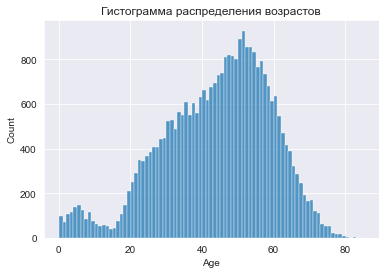

In [23]:
sns.set_style('darkgrid')
plt.title('Гистограмма распределения возрастов')
sns.histplot(titanic_data['Age'], binwidth=1)

In [10]:
print('male and female ratio')
titanic_data['Sex'].value_counts() / titanic_data['Sex'].count()

male and female ratio


female    0.56504
male      0.43496
Name: Sex, dtype: float64

<AxesSubplot:title={'center':'Гистограмма распределения стоимости билета'}, xlabel='Fare', ylabel='Count'>

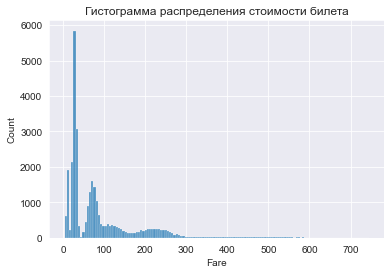

In [24]:
plt.title('Гистограмма распределения стоимости билета')
sns.histplot(titanic_data['Fare'])

In [12]:
titanic_data['Ticket'].value_counts()

PC          7
25386       5
27184       5
13527       5
26616       5
           ..
192613      1
442657      1
4044285     1
27718       1
PC 15008    1
Name: Ticket, Length: 27951, dtype: int64

In [26]:
titanic_data['Embarked'].value_counts() #порты отправления

S    14470
C    12529
Q     3882
Name: Embarked, dtype: int64

Количество человек в каждой кабине:

In [27]:
titanic_data['Cabin'].value_counts()

C19828    6
C11283    5
A9127     5
C13699    5
C6906     5
         ..
B8442     1
A8273     1
C16049    1
C5799     1
D17243    1
Name: Cabin, Length: 26099, dtype: int64

Видимо класс каюты?

In [29]:
titanic_data['Cabin'].apply(lambda s: s[0]).value_counts()

C    11386
B     7138
A     6081
D     3516
E     1686
F      581
G      464
T       29
Name: Cabin, dtype: int64

In [30]:
titanic_data['Parch'].value_counts()

0    21573
2     4858
1     3483
3      523
4      168
5      140
9      104
6       32
Name: Parch, dtype: int64

In [31]:
titanic_data['SibSp'].value_counts()

0    19652
1     8955
2     1428
3      576
4      178
8       58
5       34
Name: SibSp, dtype: int64

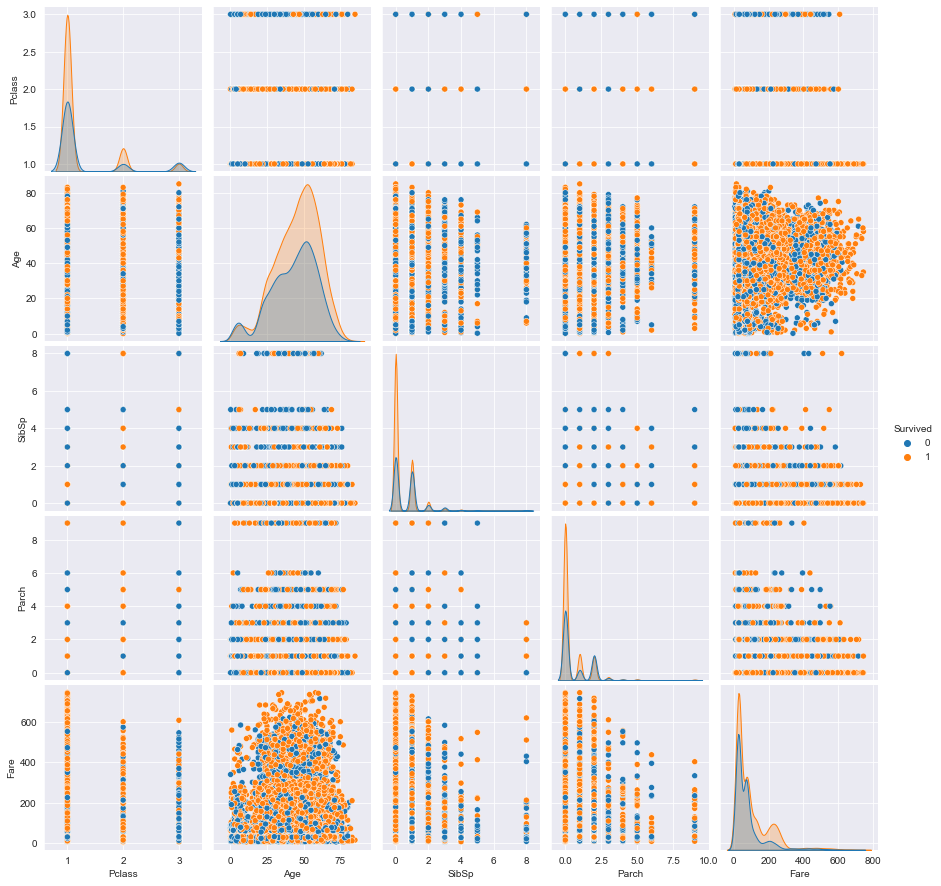

In [34]:
sns.pairplot(data=titanic_data, hue='Survived')

Процент выживших в каждом классе

In [43]:
titanic_data.groupby('Pclass').Survived.sum() / titanic_data.groupby('Pclass').Survived.count()

Pclass
1    0.615122
2    0.687908
3    0.390896
Name: Survived, dtype: float64

# Summary